### Pichu/Pikachu Discriminator - Supervised ML Model (k-NN)

--- 

Datapoints, __width__ and __height__, (features) categorized by __label__, are imported as raw data in the following format:

`(width (cm), height (cm), label (0-pichu, 1-pikachu))` <br>
`21.959384499160468, 31.23956701424158, 0` <br>
`23.63591632187622, 36.46821490673444, 1`

After cleaning the original data, we convert it into test and training data by randomly selecting a subset of the datapoints as training data (80%), and use the remaining datapoints as test data.

We then predict the newly added Pokémon based of k-nearest-neighbour classification method.

The result is plotted and represented with blue datapoints as *Pichus* and red as *Pikachus*.

len(PokeWidth)=150, len(PokeHeight)=150, len is equal.


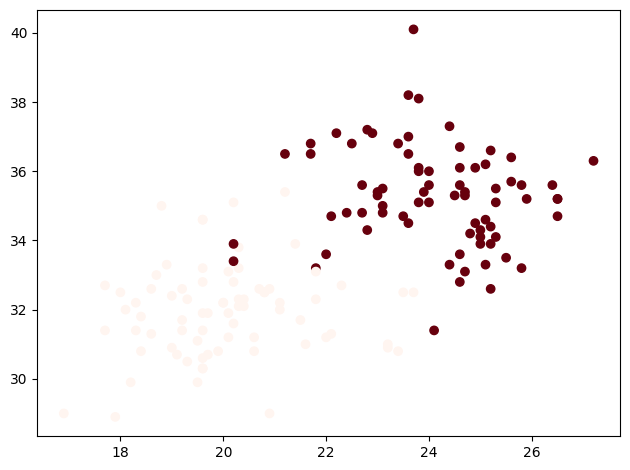

Plotted from lists.


In [302]:
from __future__ import annotations
import re, math, pprint
import numpy as np
import matplotlib.pyplot as plt

def get_distance(P: tuple, Q: tuple) -> float:
    """Calculates euclidean distance between two points."""
    return math.sqrt((P[0] - Q[0])**2 + (P[1] - Q[1])**2)


def extract_data(data_list: list, dictionary_return: bool) -> None | dict:
    """ Take list with comma separated values and either append rounded values to
    PokeWidth, PokeHeight & PokeLabel lists OR return dictionary. """

    # Method 1: Dictionary ouput by @Andreas-Svensson
    if dictionary_return: # Create and return dictionary
        datapoints = [i.split(", ") for i in data_list]
        item = [[float(i) for i in value] for value in datapoints]

        # Create dictionary
        Pokedex = {
            "Pikachu" : {
            "Width (cm):" :[i[0] for i in item if i[2] == 1],
            "Height (cm):":[i[1] for i in item if i[2] == 1]},
            "Pichu"   : {
            "Width (cm)"  :[i[0] for i in item if i[2] == 0],
            "Height (cm)" :[i[1] for i in item if i[2] == 0]} }
        return Pokedex

    # Method 2: List append by @Kevy69
    for item in data_list: # Append to lists if dictionary_true = False
        # Remove white space and line break
        item = re.sub('[ \n]', '', item)

        # Round (1 decimal) and append data to lists
        width, height, label = [float(string) for string in item.split(',')]
        PokeWidth.append(round(width,1))
        PokeHeight.append(round(height,1))
        PokeLabel.append(int(label))

if __name__ == "__main__":

    # Open and read datapoints.txt
    file_path = "../../Data/datapoints.txt"
    with open(file_path) as test_point:
        data_list = test_point.readlines()
        # Remove title from list
        data_list.pop(0)

    PokeWidth = []
    PokeHeight = []
    PokeLabel = []

    # Extract data to lists, checks if length is equal
    clean2 = extract_data(data_list, 0)
    if len(PokeWidth) == len(PokeHeight):
        print(f"{len(PokeWidth)=}, {len(PokeHeight)=}, len is equal.")
        plt.scatter(PokeWidth,PokeHeight,c = PokeLabel, cmap='Reds')
        plt.show()
    else:
        raise ValueError(f"len is not equal.")
    print("Plotted from lists.")

Scatter plot

In [ ]:
#import testpoints.txt
file_path = "../../Data/testpoints.txt"
with open(file_path) as test_point:
        data_list = test_point.readlines()
        # Remove title from list
        data_list.pop(0)


In [ ]:
# Input test data to classify
w = float(input("Input creature width (cm):"))
h = float(input("Input creature height (cm):"))


---
First we convert the original data into test and training data by randomly selecting a subset (75%) of the datapoints as training data, and use the remaining datapoints as test data.